In [1]:
import pyNUISANCE as pn

In [2]:
input_files = {
    "filepaths": [
"https://portal.nersc.gov/project/nuisance/IOP_review_2023/GENIEv3_G18_10a_00_000/DUNEND_FHC_numu_Ar40_GENIEv3_G18_10a_00_000_1M_0000_NUISFLAT.root",
"https://portal.nersc.gov/project/nuisance/IOP_review_2023/GENIEv3_G18_10a_00_000/DUNEND_FHC_numu_Ar40_GENIEv3_G18_10a_00_000_1M_0001_NUISFLAT.root"
    ]
}

In [3]:
evs = pn.EventSource("https://portal.nersc.gov/project/nuisance/IOP_review_2023/GENIEv3_G18_10a_00_000/DUNEND_FHC_numu_Ar40_GENIEv3_G18_10a_00_000_1M_0000_NUISFLAT.root")
if not evs:
    print("Error: failed to open input file")

In [4]:
import pyProSelecta as pps
fg = pn.EventFrameGen(evs,20).add_column("enu",pps.project.enu)

In [5]:
ef = fg.first()
print(ef)

 -----------------------------------------------------
 | event.number | weight.cv | process.id |       enu |
 -----------------------------------------------------
 |            0 |         1 |        600 | 2.153e+04 |
 |            1 |         1 |        600 | 2.945e+04 |
 |            2 |         1 |        451 |      2012 |
 |            3 |         1 |        500 |      3622 |
 |            4 |         1 |        600 | 2.717e+04 |
 |            5 |         1 |        200 |      2594 |
 |            6 |         1 |        600 | 1.041e+04 |
 |            7 |         1 |        401 |      2229 |
 |            8 |         1 |        500 |      2739 |
 |            9 |         1 |        250 |      2571 |
 |           10 |         1 |        402 |      2997 |
 |           11 |         1 |        402 |      2575 |
 |           12 |         1 |        200 |      2611 |
 |           13 |         1 |        600 |      4049 |
 |           14 |         1 |        400 |      3093 |
 |        

In [6]:
print(ef.fatx())
print(ef.sumw())
print(ef.nevents())

1.241710468735305e-38
20.0
20


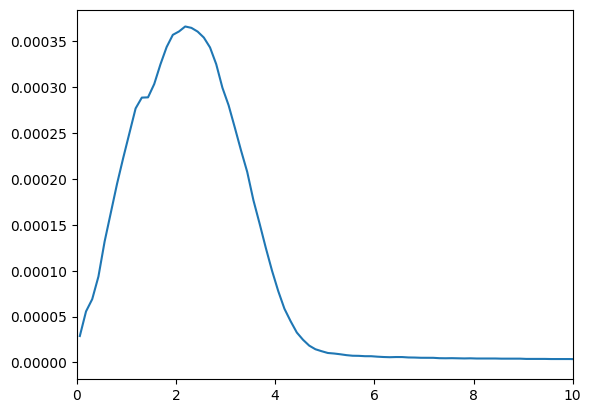

In [7]:
import pyNuHepMC as nhm
import numpy as np
import matplotlib.pyplot as plt

gri = evs.run_info()
numu_flux_dist = nhm.ReaderUtils.GC7.read_energy_distribution(gri,14)
bin_edges = numu_flux_dist.bin_edges

plt.xlim([0,10])
plt.plot(numu_flux_dist.get_bin_centers(),numu_flux_dist.get_content_count())
plt.show()